In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import json

import random
from matplotlib import ticker
import math

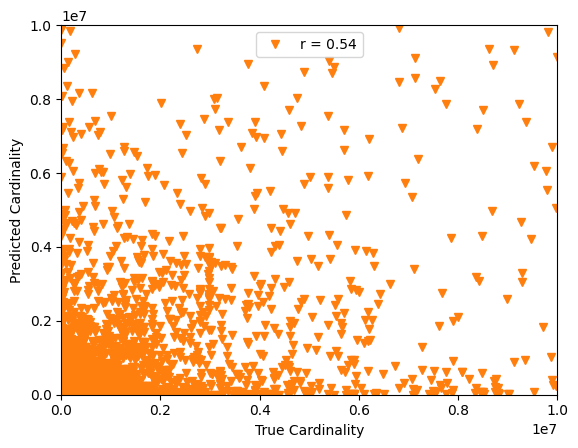

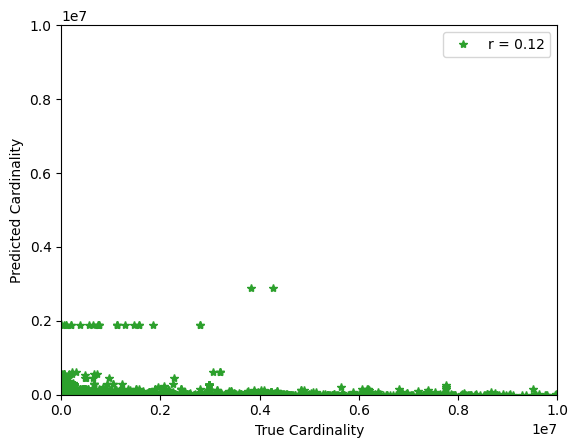

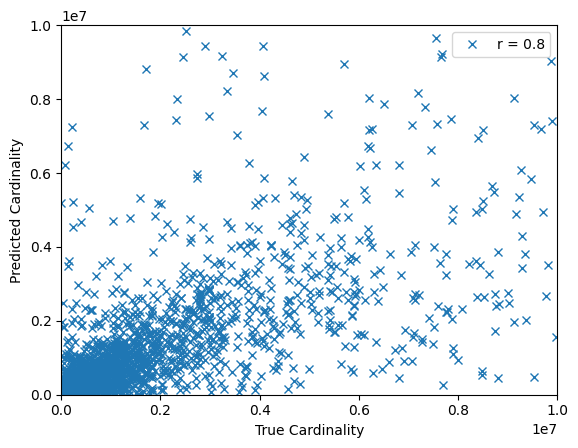

In [5]:
datasets = ["lubm", "yago", "swdf"]
query_types = ["star", "path"]


gts_lmkg = []
preds_lmkg = []

gts = []
preds = []

gts_lss = []
preds_lss = []



for dataset in datasets:
    for query_type in query_types:
        # Loading Data for LMKG
        gts_lmkg += list(np.load("../Datasets/"+dataset+"/Results/"+query_type+"/Joint_Model/gts_lmkg.npy"))
        preds_lmkg += list(np.load("../Datasets/"+dataset+"/Results/"+query_type+"/Joint_Model/preds_lmkg.npy"))

        # Loading Data for TPN
        gts += list(np.load("../Datasets/"+dataset+"/Results/"+query_type+"/Joint_Model/gts.npy"))
        preds += list(np.load("../Datasets/"+dataset+"/Results/"+query_type+"/Joint_Model/preds.npy"))

        # Loading Data for LSS
        gts_lss += list(np.load("../Datasets/"+dataset+"/Results/"+query_type+"/Joint_Model/gts_lss.npy"))
        preds_lss += list(np.load("../Datasets/"+dataset+"/Results/"+query_type+"/Joint_Model/preds_lss.npy"))
        # Take exponent as model predicts logarithm

gts_lss += 2**np.array(gts_lss)
preds_lss += 2**np.array(preds_lss)
        
# Select 1000 random datapoints
# indices = random.sample(range(len(gts_lss)), 100000)
# gts = [gts[i] for i in indices]
# preds = [preds[i] for i in indices]
# gts_lmkg = [gts_lmkg[i] for i in indices]
# preds_lmkg = [preds_lmkg[i] for i in indices]
# gts_lss = [gts_lss[i] for i in indices]
# preds_lss = [preds_lss[i] for i in indices]

lim = 10000000



gts_lmkgr = np.array(gts_lmkg)
preds_lmkgr = np.array(preds_lmkg)
gts_lmkg = np.array(gts_lmkg)
preds_lmkg = np.array(preds_lmkg)

preds_lmkg = preds_lmkg[(gts_lmkgr < lim) & (preds_lmkgr < lim)]
gts_lmkg = gts_lmkg[(gts_lmkgr < lim) & (preds_lmkgr < lim)]

plt.plot(gts_lmkg, np.round(preds_lmkg), "v", color="tab:orange",
        label=f'r = {np.round(np.corrcoef(gts_lmkg,np.round(preds_lmkg))[0,1], 2)}')
plt.xlabel("True Cardinality")
plt.ylabel("Predicted Cardinality")
plt.legend()
plt.xlim(0, lim)
plt.ylim(0,lim)
plt.show()


## LSS
gts_lssr = np.array(gts_lss)
preds_lssr = np.array(preds_lss)
gts_lss = np.array(gts_lss)
preds_lss = np.array(preds_lss)

preds_lss = preds_lss[(gts_lssr < lim) & (preds_lssr < lim)]
gts_lss = gts_lss[(gts_lssr < lim) & (preds_lssr < lim)]

plt.plot(gts_lss, np.round(preds_lss), "*", color="tab:green",
        label=f'r = {np.round(np.corrcoef(gts_lss,np.round(preds_lss))[0,1], 2)}')
plt.xlabel("True Cardinality")
plt.ylabel("Predicted Cardinality")
plt.legend()
plt.xlim(0, lim)
plt.ylim(0,lim)
plt.show()


# GNCE
gtsr = np.array(gts)
predsr = np.array(preds)
gts = np.array(gts)
preds = np.array(preds)

preds = preds[(gtsr < lim) & (predsr < lim)]
gts = gts[(gtsr < lim) & (predsr < lim)]

plt.plot(gts, np.round(preds), "x", color="tab:blue",
         label = f'r = {np.round(np.corrcoef(gts,np.round(preds))[0,1], 2)}')

plt.xlabel("True Cardinality")
plt.ylabel("Predicted Cardinality")
plt.legend()
plt.xlim(0, lim)
plt.ylim(0,lim)
plt.show()